<font size=6 color="#0098CD">
Laboratorio: simulación de circuitos
</font>

---
**Asignatura:** Física II

**Presentado por:** *Ronaldo Jiménez Acosta*

**Fecha:** 21-Nov-2022

---

### 1. Objetivos
* Aplicar la Ley de Ohm y las Leyes de Kirchhoff en la solución de circuitos de corriente directa.
* Utilizar el lenguaje de programación Python para realizar cálculos básicos y resolver sistemas de ecuaciones lineales. 
* Emplear herramientas de simulación de circuitos eléctricos para comprobar los resultados obtenidos en forma manual.


### 2. Descripción de la actividad y pautas de elaboración

A continuación, se plantean dos circuitos eléctricos que deben resolverse aplicando el análisis de mallas. El informe debe desarrollarse sobre este cuaderno de Google Colaboratory. La entrega debe hacerse **únicamente en formato PDF**, usando la opción Archivo/Imprimir del entorno de desarrollo y realizando los ajustes necesarios para garantizar la correcta visualización de todo el documento. Extensión máxima: 10 páginas.

---

#### Circuito 1. $\color{green}{\text{(4.5 puntos)}}$
---
Se desea conocer las corrientes $I_1$, $I_2$ e $I_3$ en el siguiente circuito:

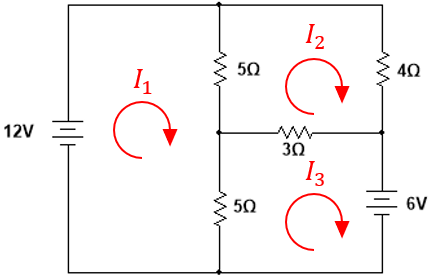

a) Utilizando el análisis de mallas, plantea el sistema $Ax = b$ que modela el circuito. Luego, resuelve el sistema aplicando eliminación gaussiana. Registra el procedimiento paso a paso.

> #### Solución:
>
> *Ley de Ohm*:
>
> * $V = R.I$
> * $R = \frac{V}{I}$
>
> * $I = \frac{V}{R}$
>
> ##### 1. Obtener primer ecuación:
>
> $-5I_{1} +5I_{2} - 5I_{1} +5I_{3} + 12 = 0$
>
> $-10I_{1} + 5I_{2} +5I_{3} + 12 = 0$
>
> $12 = 10I_{1} - 5I_{2} -5I_{3}$
>
> * $10I_{1} - 5I_{2} -5I_{3} = 12$
>
> ##### 2. Obtener segunda ecuación:
>
> $-4I_{2} -3I_{2} + 3I_{3} -5I_{2} +5I_{1} = 0$
>
> * $5I_{1} - 12I_{2} + 3I_{3} = 0$
>
> ##### 3. Obtener tecer ecuación:
>
> $-6 -5I_{3} +5I_{1} - 3I_{3} + 3I_{2}= 0$
>
> $5I_{1} + 3I_{2} -8I_{3} -6 = 0$
>
> * $5I_{1} + 3I_{2} -8I_{3} = 6$
>
> ##### 4. Expresamos el sistema de ecuaciones como una matriz aumentada:
>
>$ A = \begin{bmatrix}
> 10  & -5 & -5 & 12\\
> 5  & -12 & 3 & 0\\
> 5 & 3 & -8 & 6
> \end{bmatrix}$
>


In [32]:
import numpy as np
A = np.array([[10,-5,-5,12], [5,-12,3,0], [5,3,-8,6]])
print(A)
print()

print('# intercambiamos F1 <--> F2')
A = np.array([[5,-12,3,0], [10,-5,-5,12], [5,3,-8,6]])
print(A)
print()

print('# 1. para obtener el primer 0 hacemos: F2 - 2F1')
F2 = A[1] - 2*A[0]
A[1] = F2
print(A)
print()

print('# 2. para obtener el segundo 0 hacemos: F3 - F1')
F3 = A[2] - A[0]
A[2] = F3
print(A)
print()

print('# 2. para obtener el tercer 0 hacemos: 19F3 - 15F2')
F3 = 19*A[2] - 15*A[1]
A[2] = F3
print(A)
print()



[[10 -5 -5 12]
 [5 -12 3 0]
 [5 3 -8 6]]

# intercambiamos F1 <--> F2
[[5 -12 3 0]
 [10 -5 -5 12]
 [5 3 -8 6]]

# 1. para obtener el primer 0 hacemos: F2 - 2F1
[[5 -12 3 0]
 [0 19 -11 12]
 [5 3 -8 6]]

# 2. para obtener el segundo 0 hacemos: F3 - F1
[[5 -12 3 0]
 [0 19 -11 12]
 [0 15 -11 6]]

# 2. para obtener el tercer 0 hacemos: 19F3 - 15F2
[[5 -12 3 0]
 [0 19 -11 12]
 [0 0 -44 -66]]



In [5]:
I3 = -66/-44
print(f'I3 = {round(I3,2)}')


I2 = (12 + 16.5)/19
print(f'I2 = {round(I2,2)}')

I1 = 13.5/5
print(f'I1 = {round(I1,2)}')


I3 = 1.5
I2 = 1.5
I1 = 2.7


**Respuesta:**
>
>$\begin{bmatrix}
> I_{1} &\\
> I_{2} &\\
> I_{3} 
> \end{bmatrix}$
> $=$ 
> $\begin{bmatrix}
> 2.7 &\\
> 1.5 &\\
> 1.5 
> \end{bmatrix}$
> $=$ 
> $\begin{bmatrix}
> 27/10 &\\
> 3/2 &\\
> 3/2
> \end{bmatrix}$

b) Comprueba el procedimiento de eliminación gaussiana con ayuda de Numpy. 

In [36]:
import numpy as np
import fractions
np.set_printoptions(formatter={'all': lambda x: str(
    fractions.Fraction(x).limit_denominator())})
# Matriz A
A = np.array([[10,-5,-5], [5,-12,3], [5,3,-8]])
# Vector b, terminos independientes
b = np.array([12, 0, 6])

try:
    # calculamos el determinante:
    determinante = np.linalg.det(A)
    print(f'El determinante es: {round(determinante,2)}')
    print()
    # matriz no singular
    if determinante != 0:
        print('Solución del sistema:')
        x = np.linalg.solve(A, b)
        print(x)
        print()

        print('Comprobamos que A * x = b')
        print(np.matmul(A, x))
    else:
        print('La matriz es singular')
except Exception as e:
    print(f'Ha ocurrido una excepción: {e}')

El determinante es: 220.0

Solución del sistema:
[27/10 3/2 3/2]

Comprobamos que A * x = b
[12 0 6]


c) Resuelve el circuito usando un simulador como [LTspice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html). Agrega al informe una impresión de pantalla con los resultados de la simulación.

![img_sim_1](https://user-images.githubusercontent.com/53100460/201708063-f7a28ad8-d4e9-4ffd-9e46-0e4f1632e98e.PNG)

d) ¿Es correcto afirmar que las fuentes de tensión están entregando potencia? Explica tu respuesta. Calcula además la caída de tensión en el resistor de $4~\Omega$.

>**Solución:**
>
> $P = V . I$ 
>
> En la gráfica se evidencia voltaje (v) e intensidad (I), entonces es correcto afirmar que hay potencia.

In [10]:
I2 = 3/2
R3 = 4
resultado = R3*I2
print(f'la caída de tensión es: {round(resultado,2)}')

la caída de tensión es: 6.0


---

#### Circuito 2. $\color{green}{\text{(4.5 puntos)}}$
---
Se desea conocer las corrientes $I_1$, $I_2$ e $I_3$ en el siguiente circuito:

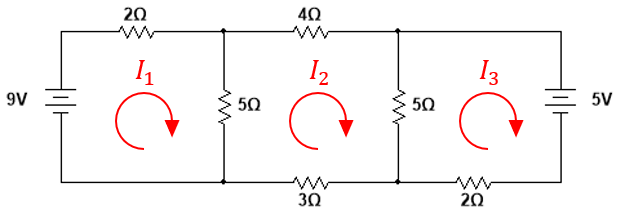

a) Utilizando el análisis de mallas, plantea el sistema $Ax = b$ que modela el circuito. Luego, resuelve el sistema aplicando eliminación gaussiana. Registra el procedimiento paso a paso.

> #### Solución:
>
> *Ley de Ohm*:
>
> * $V = R.I$
> * $R = \frac{V}{I}$
>
> * $I = \frac{V}{R}$
>
> ##### 1. Obtener primer ecuación:
>
> $-2I_{1} -5I_{1} + 5I_{2} + 9 = 0$
>
> $-7I_{1} + 5I_{2} + 9 = 0$
>
> $9 = 7I_{1} - 5I_{2}$
>
> * $7I_{1} - 5I_{2} = 9$
>
> ##### 2. Obtener segunda ecuación:
>
> $-4I_{2} -5I_{2} + 5I_{3} -3I_{2} -5I_{2} +5I_{1}= 0$
>
> * $5I_{1} - 17I_{2} + 5I_{3} = 0$
>
> ##### 3. Obtener tecer ecuación:
>
> $-5 -2I_{3} -5I_{3} + 5I_{2} = 0$
>
> $-7I_{3} + 5I_{2} - 5 = 0$
>
> * $5I_{2} - 7I_{3} = 5$
>
> ##### 4. Expresamos el sistema de ecuaciones como una matriz aumentada:
>
>$ A = \begin{bmatrix}
> 7  & -5 & 0 & 9\\
> 5  & -17 & 5 & 0\\
> 0  & 5 & -7 & 5
> \end{bmatrix}$
>


In [24]:
import numpy as np
A = np.array([[7,-5,0,9], [5,-17,5,0], [0,5,-7,5]])
print(A)
print()

print('# intercambiamos F1 <--> F2')
A = np.array([[5,-17,5,0], [7,-5,0,9], [0,5,-7,5]]) 
print(A)
print()

print('# 1. para obtener el primer 0 hacemos: 5F2 - 7F1')
F2 = 5*A[1] - 7*A[0]
A[1] = F2
print(A)
print()

print('# 2. para obtener el tercer 0 hacemos: 94F3 - 5F2')
F3 = 94*A[2] - 5*A[1]
A[2] = F3
print(A)
print()

[[7 -5 0 9]
 [5 -17 5 0]
 [0 5 -7 5]]

# intercambiamos F1 <--> F2
[[5 -17 5 0]
 [7 -5 0 9]
 [0 5 -7 5]]

# 1. para obtener el primer 0 hacemos: 5F2 - 7F1
[[5 -17 5 0]
 [0 94 -35 45]
 [0 5 -7 5]]

# 2. para obtener el tercer 0 hacemos: 94F3 - 5F2
[[5 -17 5 0]
 [0 94 -35 45]
 [0 0 -483 245]]



In [25]:
I3 = 245/-483
print(f'I3 = {round(I3,2)}')


I2 = (45-17.75)/94
print(f'I2 = {round(I2,2)}')

I1 = 7.48/5
print(f'I1 = {round(I1,2)}')

I3 = -0.51
I2 = 0.29
I1 = 1.5


**Respuesta:**
>
>$\begin{bmatrix}
> I_{1} &\\
> I_{2} &\\
> I_{3} 
> \end{bmatrix}$
> $=$ 
> $\begin{bmatrix}
> 1.5 &\\
> 0.29 &\\
> -0.51 
> \end{bmatrix}$
> $=$ 
> $\begin{bmatrix}
> 103/69 &\\
> 20/69 &\\
> -35/69 
> \end{bmatrix}$

b) Comprueba el procedimiento de eliminación gaussiana con ayuda de Numpy. 

In [26]:
import numpy as np
import fractions
np.set_printoptions(formatter={'all': lambda x: str(
    fractions.Fraction(x).limit_denominator())})
# Matriz A
A = np.array([[7,-5,0], [5,-17,5], [0,5,-7]])
# Vector b, terminos independientes
b = np.array([9, 0, 5])

try:
    # calculamos el determinante:
    determinante = np.linalg.det(A)
    print(f'El determinante es: {round(determinante,2)}')
    print()
    # matriz no singular
    if determinante != 0:
        print('Solución del sistema:')
        x = np.linalg.solve(A, b)
        print(x)
        print()

        print('Comprobamos que A * x = b')
        print(np.matmul(A, x))
    else:
        print('La matriz es singular')
except Exception as e:
    print(f'Ha ocurrido una excepción: {e}')

El determinante es: 483.0

Solución del sistema:
[103/69 20/69 -35/69]

Comprobamos que A * x = b
[9 0 5]


c) Resuelve el circuito usando un simulador como [LTspice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html). Agrega al informe una impresión de pantalla con los resultados de la simulación.

![img_sim_2](https://user-images.githubusercontent.com/53100460/201715711-73052961-d98e-40bb-981c-d2500b695079.PNG)

d) Calcula la potencia disipada por cada uno de los ocho elementos del circuito. Luego realiza la sumatoria. ¿El resultado tiene sentido? Explica tu respuesta.

>De acuerdo al circuito simulado en **LTspice** podemos observar y obtener la potencia disipada (w) en cada punto (8) y son las siguientes:
>* $V_{1} = 13.43 W$
>* $V_{2} = 2.54 W$
>* $R_{1} = 4.46 W$
>* $R_{2} = 7.23 W$
>* $R_{3} = 0.34 W$
>* $R_{4} = 3.18 W$
>* $R_{5} = 0.26 W$
>* $R_{6} = 0.51 W$

In [11]:
WT = 13.43 + 2.54 + 4.46 + 7.23 + 0.34 + 3.18 + 0.26 + 0.51
print(f'la sumatoria de las potencias es: {round(WT,2)}')

la sumatoria de las potencias es: 31.95


---
#### Conclusiones $\color{green}{\text{(1 punto)}}$
---
Registra dos o tres conclusiones sobre esta actividad. Considera: los conceptos abordados, los problemas propuestos, las simulaciones de los circuitos y el uso del entorno interactivo Google Colaboratory para la solución.

>**Respuesta:**
>
> 1. De acuerdo a los laboratorios y temas vistos se puede afirmar que en un circuito en serie la intensidad total (IT) es igual en todo el circuito $(IT =  I1 = I2 = I3 = In)$. La resistencia total (RT) es igual a la sumatoria de todas las resistencias del circuito $(RT = R1 + R2 + R3 + Rn)$  y la tensión total (VT) es igual a la sumatoria de las tensiones del circuito $(VT = V1 + V2 + V3 + Vn)$.
>
> 2. En circuitos en paralelo la tensión total (VT) es igual en todo el circuito $(VT = V1 = V2 = V3 = Vn)$, la intensidad total (IT) es igual a la sumatoria de las intensidades $(IT = I1 + I2 + I3 + In)$ y la resistencia total (RT)  es igual a la inversa de la suma de las inversas de las resistencias que hay en el circuito $(RT = \frac {1}{\frac {1}{R1} + \frac {1}{R2} + \frac {1}{Rn}})$
>
> 3. Al utilizar la ley de **Kirchhoff** obtenemos un sistema de ecuaciones el cual se puede expresar como una matriz aumentada (álgebra lineal) y haciendo uso del método de eliminación gaussiana  podemos hallar el valor de cada variable (en este caso los valores de la intensidad). Se puede utilizar Python para comprobar el resultado de dicha solución.

### 3. Resultados de aprendizaje y criterios de evaluación
Esta actividad formativa del curso de Física II orienta el aprendizaje hacia el logro del siguiente resultado: 

•	*Comprender el funcionamiento de los componentes de un sistema informático a partir del análisis y la simulación de circuitos eléctricos en corriente directa y alterna*.

Para evaluar el resultado antes descrito se propone a continuación, la rúbrica con los aspectos y criterios que se tendrán en cuenta para la retroalimentación y calificación de esta actividad. 



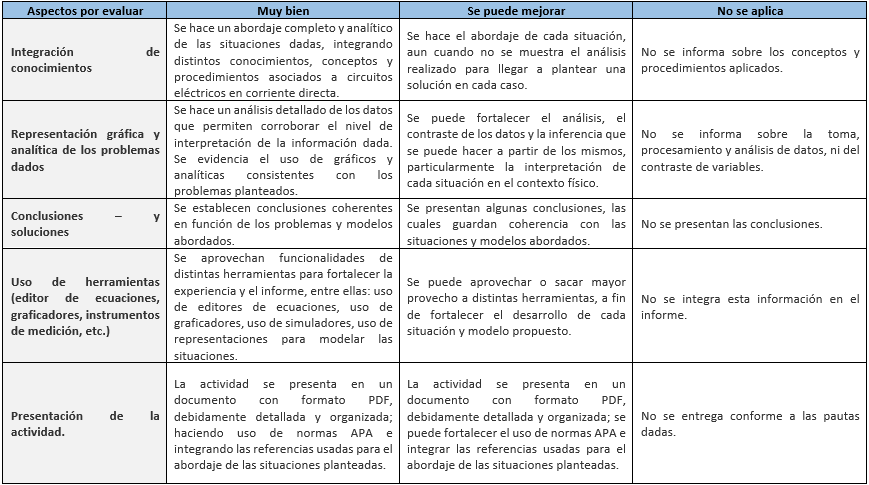